     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='ob

([<matplotlib.patches.Wedge at 0x7c711ca2cb50>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33'),
  Text(0.30000008108314646, -0.5196151954572783, '33')])

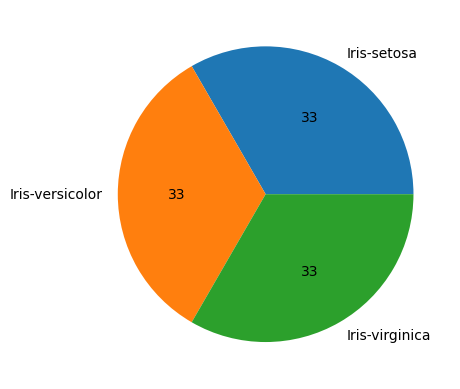

In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Cargar archivo 'iris.data'
file_name = 'iris.data'

# Nombres de las columnas
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Leer el archivo y agregar nombres de las columnas
iris = pd.read_csv(file_name, sep=',', header=None, names=column_names)

# Mostrar el dataframe
print(iris)
iris

# Verificar los nombres de las columnas
print(iris.columns)

# revisando cuantos valores hay por cada clase
counts = iris["class"].value_counts()
plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

In [2]:
# reemplazar los nombres de las clases por números para el clasificador
df3 = iris.copy()
df3["class"] = df3["class"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.iloc[:, 0:4] # X seran todas las filas con las columnas de la 0 a la 4 (anchos y altos)
y = iris.iloc[:, 4:] # y seran los nombres de las especies (etiquetas de clasificación)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')


Número total de muestras en el dataset: 150
**************************************************
Muestras para entrenamiento: 97
Tamaño de X_train: (97, 4)
**************************************************
Muestras para validación: 53
Tamaño de X_test: (53, 4)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el escalador y ajustar-transformar los datos de entrenamiento
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Transformar los datos de prueba (usando el mismo escalador ajustado)
X_test = sc.transform(X_test)

# Asegurarse de que y_train y y_test sean arrays unidimensionales
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Crear y entrenar el modelo SVM
model = SVC()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
pred = model.predict(X_test)

# Calcular y mostrar el puntaje de entrenamiento
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100:.2f}%')

# Calcular y mostrar el puntaje de prueba
test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100:.2f}%')

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


Train score of trained model: 96.91%
Test score of trained model: 98.11%


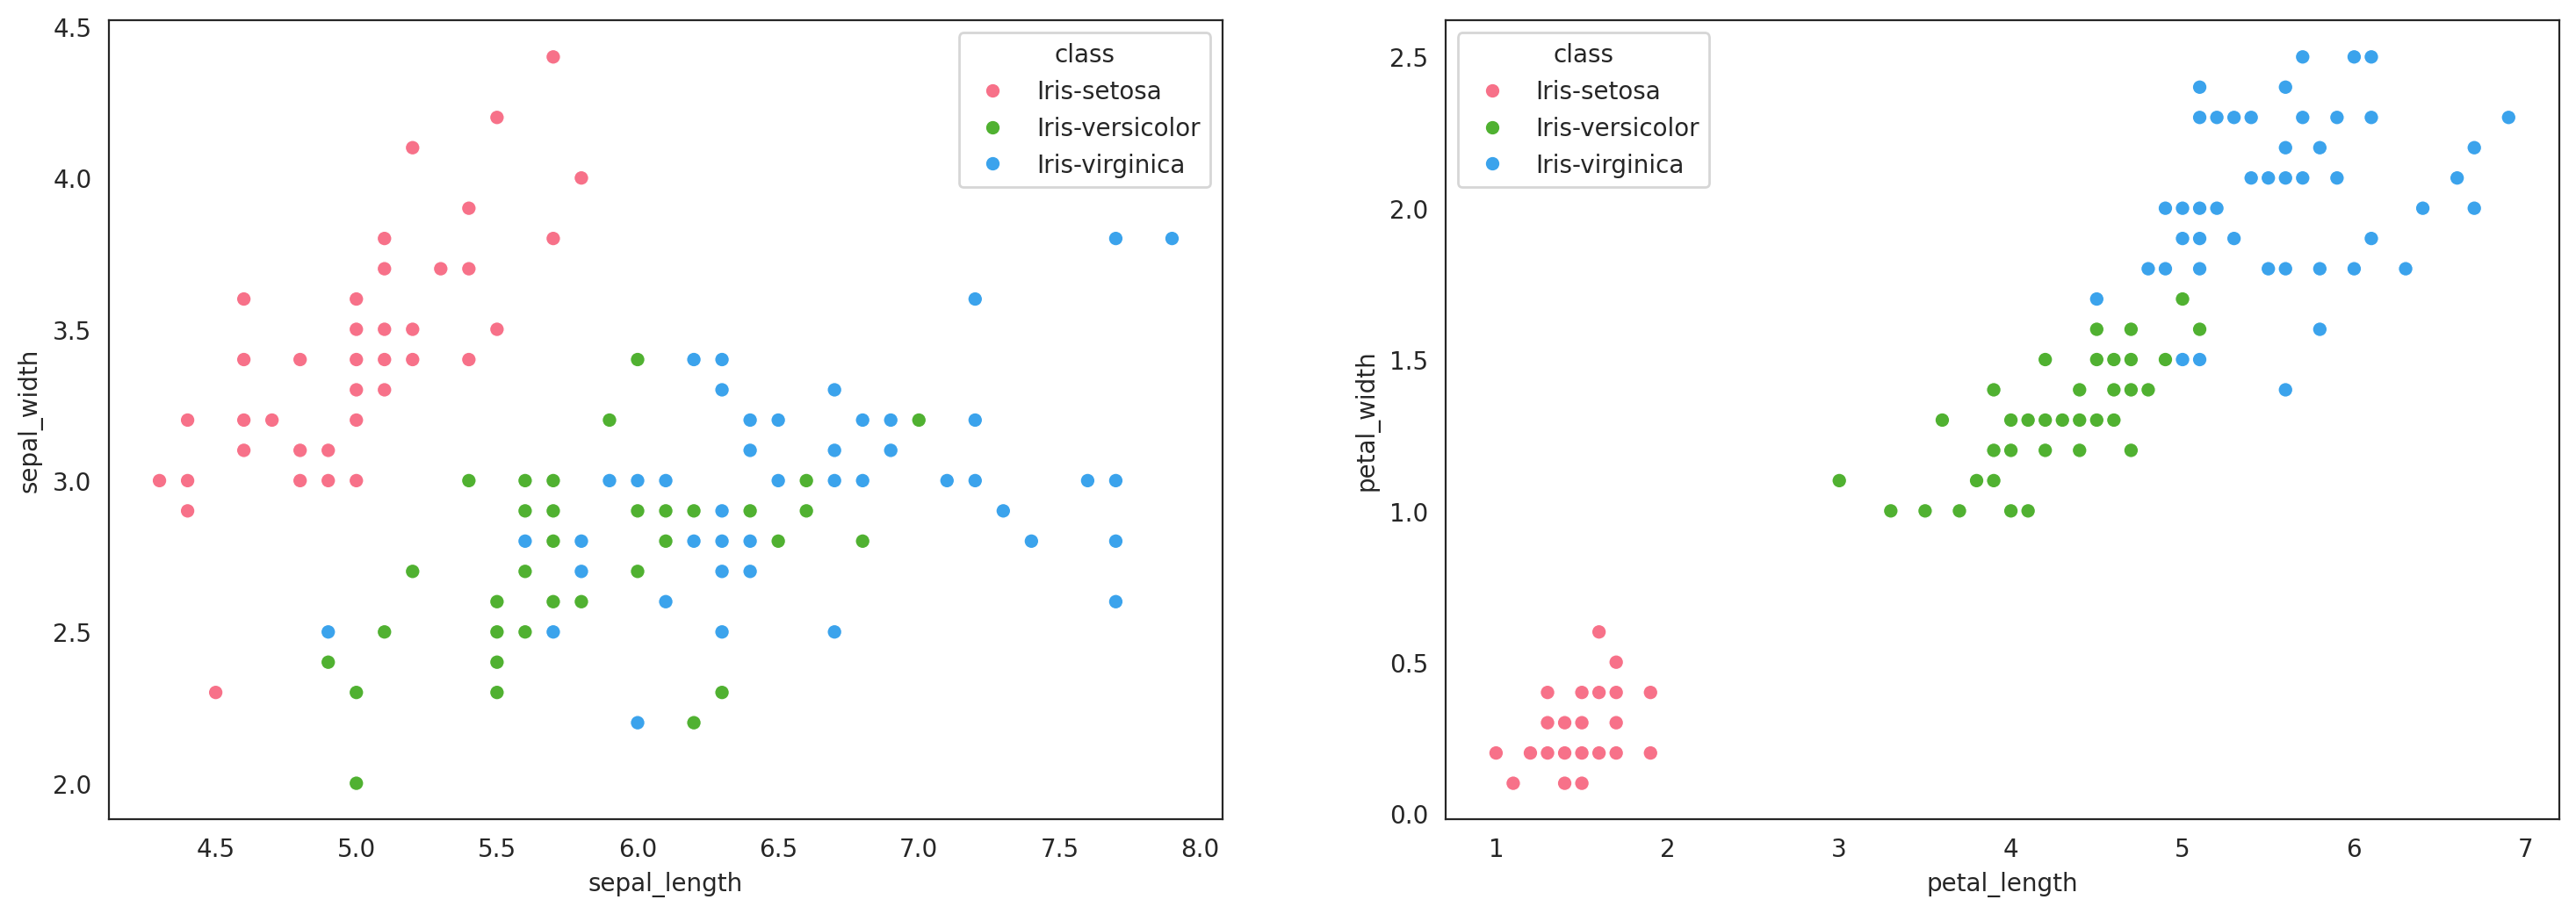

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la paleta de colores
svm_palette = sns.color_palette("husl", 3)

# Visualizando las características en un análisis multivariado, en este caso graficaremos sepalo (ancho y alto)  y pétalo (ancho y alto)
plt.figure(figsize=(18,13), dpi = 200)
sns.set_style('white')
plt.subplot(2,2,1)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'class', data = iris, palette=svm_palette)
plt.subplot(2,2,2)
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'class', data = iris, palette=svm_palette);

In [6]:
# Calcular el promedio de las características por clase
import pandas as pd
from scipy.spatial import distance

# Calcular el promedio de las características por clase
mean_by_class = iris.groupby('class').mean()
print("Promedio de las características por clase:")
print(mean_by_class)

# Obtener el mínimo y máximo de cada característica por clase
#min_by_class = iris.groupby('class').min(axis=1)
#max_by_class = iris.groupby('class').max(axis=1)

#print("\nMínimos por clase:")
#print(min_by_class)

#print("\nMáximos por clase:")
#print(max_by_class)

# Obtener los promedios de las características para las clases
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'
class_3 = 'Iris-virginica'

mean_class_1 = mean_by_class.loc[class_1].values
mean_class_2 = mean_by_class.loc[class_2].values
mean_class_3 = mean_by_class.loc[class_3].values

#print("mean_class_1 = ", mean_class_1)
#print("mean_class_2 = ", mean_class_2)
#print("mean_class_3 = ", mean_class_3)

diferencia = mean_class_1 - mean_class_2
print("diferencia entre clase 1 y clase 2 = ",diferencia)

# Calcular el mínimo y máximo para cada clase
min_class_1 = np.min(mean_class_1)
max_class_1 = np.max(mean_class_1)

min_class_2 = np.min(mean_class_2)
max_class_2 = np.max(mean_class_2)

min_class_3 = np.min(mean_class_3)
max_class_3 = np.max(mean_class_3)

print(f'Mínimos y máximos de {class_1}: Mínimo = {min_class_1}, Máximo = {max_class_1}')
print(f'Mínimos y máximos de {class_2}: Mínimo = {min_class_2}, Máximo = {max_class_2}')
print(f'Mínimos y máximos de {class_3}: Mínimo = {min_class_3}, Máximo = {max_class_3}')

# Calcular la distancia euclidiana entre los promedios
euclidean_dist = distance.euclidean(mean_class_1, mean_class_2)

print(f"Distancia euclidiana entre clase 1 y clase 2: {euclidean_dist:.4f}")



Promedio de las características por clase:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026
diferencia entre clase 1 y clase 2 =  [-0.93   0.648 -2.796 -1.082]
Mínimos y máximos de Iris-setosa: Mínimo = 0.24400000000000002, Máximo = 5.006
Mínimos y máximos de Iris-versicolor: Mínimo = 1.3259999999999998, Máximo = 5.936
Mínimos y máximos de Iris-virginica: Mínimo = 2.026, Máximo = 6.587999999999999
Distancia euclidiana entre clase 1 y clase 2: 3.2052


             class  sepal_length  sepal_width  petal_length  petal_width
0      Iris-setosa         5.006        3.418         1.464        0.244
1  Iris-versicolor         5.936        2.770         4.260        1.326
2   Iris-virginica         6.588        2.974         5.552        2.026


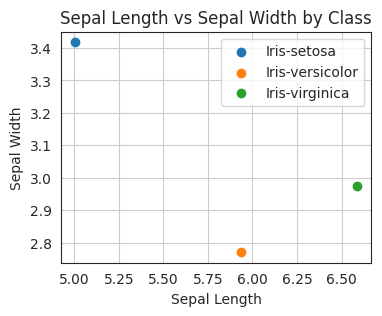

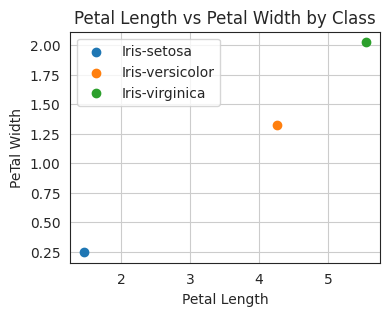

In [7]:
# Crear el DataFrame con los datos proporcionados
df = mean_by_class

# Resetear el índice para convertir 'class' en una columna
df = df.reset_index()

# Imprimir las primeras filas para verificar la estructura del dataset
print(df.head())

# Crear la gráfica de sépalos
plt.figure(figsize=(4, 3))

# Graficar puntos para cada clase
for i, row in df.iterrows():
    plt.scatter(row['sepal_length'], row['sepal_width'], label=row['class'])

# Etiquetas de los ejes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width by Class')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.grid(True)
plt.show()


# Crear la gráfica de pétalos
plt.figure(figsize=(4, 3))

# Graficar puntos para cada clase
for i, row in df.iterrows():
    plt.scatter(row['petal_length'], row['petal_width'], label=row['class'])

# Etiquetas de los ejes
plt.xlabel('Petal Length')
plt.ylabel('PeTal Width')
plt.title('Petal Length vs Petal Width by Class')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.grid(True)
plt.show()

clase 1 Iris-setosa
clase 2 Iris-versicolor
vec1 [5.006 3.418 1.464 0.244]
vec2 [5.936 2.77  4.26  1.326]
clase 1 Iris-setosa
clase 2 Iris-virginica
vec1 [5.006 3.418 1.464 0.244]
vec2 [6.588 2.974 5.552 2.026]
clase 1 Iris-versicolor
clase 2 Iris-virginica
vec1 [5.936 2.77  4.26  1.326]
vec2 [6.588 2.974 5.552 2.026]

Distancias entre Iris-setosa y Iris-versicolor:
  Euclidiana: 3.2051745662288034
  Manhattan: 5.4559999999999995

Distancias entre Iris-setosa y Iris-virginica:
  Euclidiana: 4.752591714001951
  Manhattan: 7.896000000000001

Distancias entre Iris-versicolor y Iris-virginica:
  Euclidiana: 1.6204888151419004
  Manhattan: 2.848



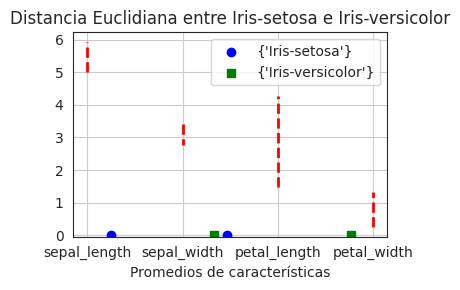

In [8]:
import numpy as np
from math import sqrt
from scipy.spatial import distance
from numpy.linalg import norm


def euclidean_distance(X, Y):
    """
    Calcula la distancia euclidiana entre dos puntos clases

    Retorna:
    float: Distancia euclidiana entre las dos clases.
    """
    X = np.array(X)
    Y = np.array(Y)

    return np.sqrt(np.sum((X - Y)**2))

def manhattan_distance(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.sum(np.abs(X - Y))


def chebyshev_distance(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.max(np.abs(X - Y))

# Cálculo de distancias
# Como se tienen los promedios de cada clase calculados previamente
# Calcular distancias entre pares de clases
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

distances = {}
for i in range(len(classes)):
    for j in range(i + 1, len(classes)):
        class1 = classes[i]
        print("clase 1",class1)
        class2 = classes[j]
        print("clase 2",class2)
        vec1 = mean_by_class.loc[class1].values
        print("vec1",vec1)
        vec2 = mean_by_class.loc[class2].values
        print("vec2",vec2)

        euclidean_dist = euclidean_distance(vec1, vec2)
        manhattan_dist = manhattan_distance(vec1, vec2)
        #chebyshev_distance = chebyshev_distance(vec1, vec2)

        distances[(class1, class2)] = {
            'euclidean': euclidean_dist,
            'manhattan': manhattan_dist,
            #'chebyshev': chebyshev_distance
        }
print()
# Imprimir resultados
for pair, dist in distances.items():
    print(f"Distancias entre {pair[0]} y {pair[1]}:")
    print(f"  Euclidiana: {dist['euclidean']}")
    print(f"  Manhattan: {dist['manhattan']}")
    #print(f"  Chebyshev: {dist['chebyshev']}")
    print()

# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_1, np.zeros_like(mean_class_1), color='blue', marker='o', label={class_1})
plt.scatter(mean_class_2, np.zeros_like(mean_class_2), color='green', marker='s', label={class_2})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_1[i], mean_class_2[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_1} e {class_2}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

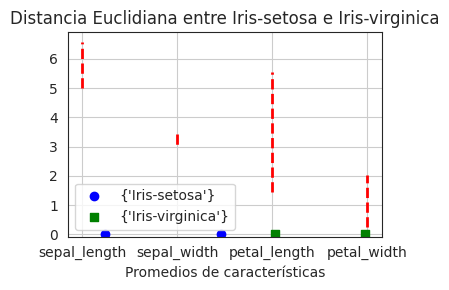

In [9]:

# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_1, np.zeros_like(mean_class_1), color='blue', marker='o', label={class_1})
plt.scatter(mean_class_3, np.zeros_like(mean_class_3), color='green', marker='s', label={class_3})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_1[i], mean_class_3[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_1} e {class_3}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

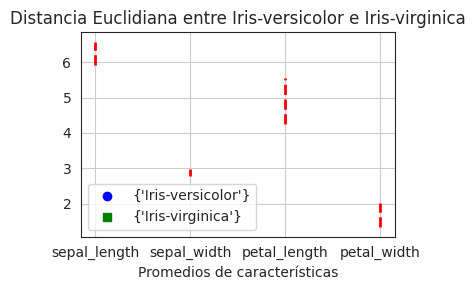

In [10]:
# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_2, np.zeros_like(mean_class_2), color='blue', marker='o', label={class_2})
plt.scatter(mean_class_3, np.zeros_like(mean_class_3), color='green', marker='s', label={class_3})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_2[i], mean_class_3[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_2} e {class_3}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Conclusión:**

La gráfica muestran las distancias euclidianas entre las especies Iris-setosa, Iris-versicolor e Iris-virginica en cuatro dimensiones: sepal_length, sepal_width, petal_length y petal_width. Observamos que las distancias varían según la característica medida. Esto sugiere que un modelo puede utilizar estas medidas para agrupar datos en función de la similitud en estas características.

Si no se tiene la etiqueta de especie ('Iris-setosa',  'Iris-versicolor' o 'Iris-virginica') en el dataset, se podría emplear medidas de distancia para intentar identificar el número de especies presentes en los datos.

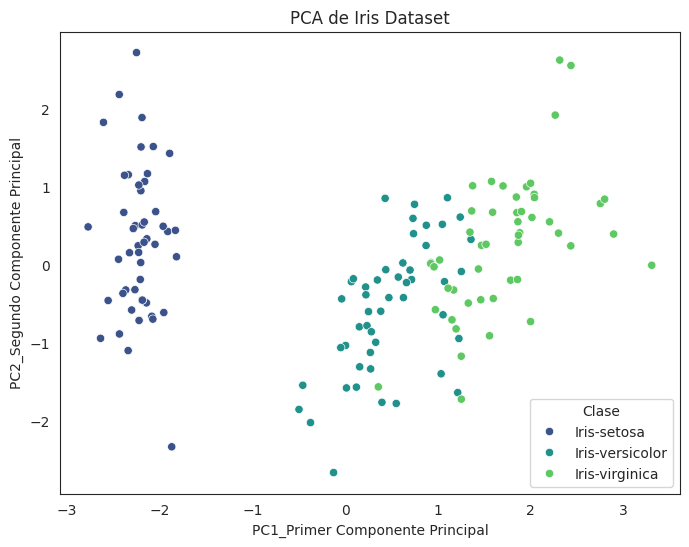

Varianza explicada por el primer componente principal: 72.77%
Varianza explicada por el segundo componente principal: 23.03%


In [11]:
#Principal Component Analysis (PCA) es una técnica de reducción de dimensionalidad
#que se utiliza para transformar un conjunto de datos de alta dimensión en un
#conjunto de datos de menor dimensión, conservando la mayor cantidad posible
#de la variabilidad original.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características y las etiquetas
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

# Visualizar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='viridis')
plt.title('PCA de Iris Dataset')
plt.xlabel('PC1_Primer Componente Principal')
plt.ylabel('PC2_Segundo Componente Principal')
plt.legend(title='Clase')
plt.show()

# Mostrar la cantidad de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el primer componente principal: {explained_variance[0]*100:.2f}%')
print(f'Varianza explicada por el segundo componente principal: {explained_variance[1]*100:.2f}%')

UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad que se utiliza para la visualización y el análisis de datos de alta dimensión. A continuación se muestra los resultados con UMAP, usando la biblioteca umap-learn con el dataset Iris.

In [12]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


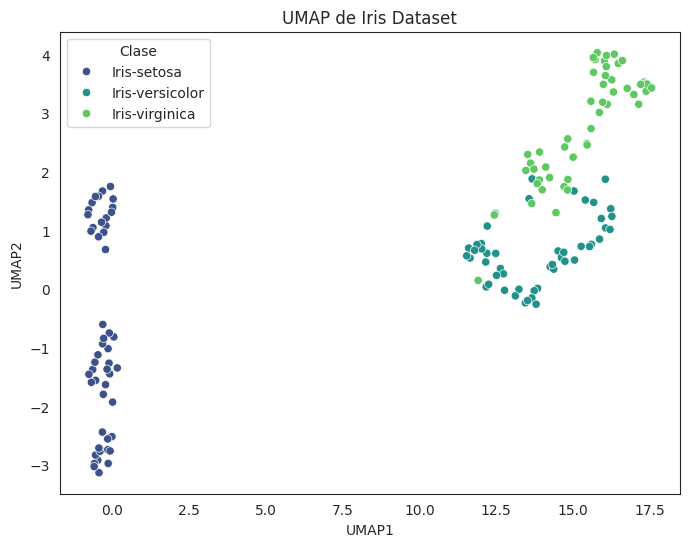

In [13]:
import warnings
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning, module='umap')

# Cargar el dataset Iris
file_name = 'iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(file_name, sep=',', header=None, names=column_names)

# Separar las características y las etiquetas
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Crear un DataFrame con los componentes UMAP
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['class'] = y

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='class', data=umap_df, palette='viridis')
plt.title('UMAP de Iris Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Clase')
plt.show()


In [14]:
#importar librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time

In [15]:
#Any duplicate rows?

df = iris.copy()
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df.drop_duplicates()
   n_dup = len(df) - len(df.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 3
Number of duplicate rows: 0


In [16]:
#Any missing values?

df.isnull().sum()



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [17]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [18]:
#Cleaning up column names (mainly for handling purposes)

cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())

df.columns = cols_cleaned

# Eliminar la columna 'class'
df = df.drop(columns=['class'])

# sanity check
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


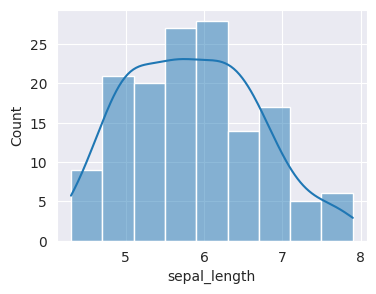

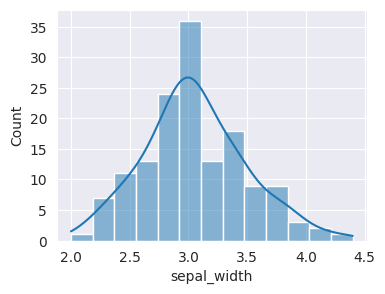

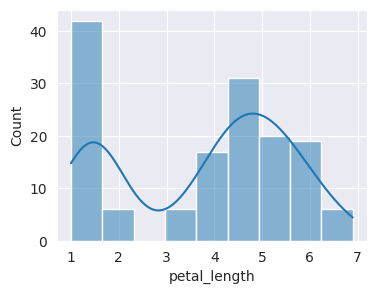

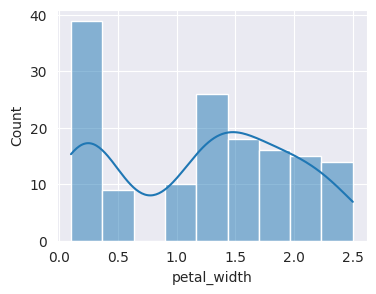

In [19]:
#Quick overview over the individual distributions

std_figure_size = (4,3)

for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

# Clustering

In [20]:
algos = ["K-means", "Mean shift", "Gaussian mixtures", "Affinity propagation", "DBSCAN", "OPTICS"]

# saving training times for each algo
training_times = []

In [21]:
#Scaling and Standardizing

X = StandardScaler().fit_transform(df)
X = PowerTransformer(standardize=False).fit_transform(X)
X = pd.DataFrame(X, columns=df.columns)

# sanity check
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.983604,0.954137,-1.125325,-1.235628
1,-1.262123,-0.129442,-1.125325,-1.235628
2,-1.546893,0.322769,-1.165852,-1.235628
3,-1.691457,0.100678,-1.084411,-1.235628
4,-1.122046,1.155757,-1.125325,-1.235628


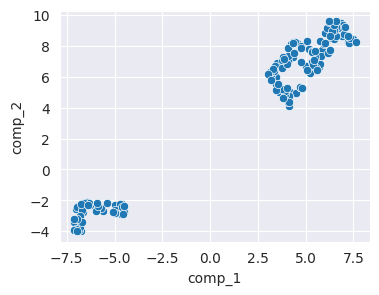

In [22]:
#Dimensionality reduction via UMAP

# Define the number of parallel jobs to use (if needed)
n_parallel_jobs = -1  # Use all available cores, or set to a specific number

# Set a fixed random state for reproducibility
fixed_random_state = 42

reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs=n_parallel_jobs, random_state=fixed_random_state)
embedding = reducer.fit_transform(X)

X = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X, x="comp_1", y="comp_2")
plt.show()

In [23]:
#Definition of plotting and convergence check function

# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.

    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.

    Returns
    =======
    None
    Prints a figure.

    """

    # Checking of input parameters omitted for this notebook

    labels = sorted(pd.Series(labels_all).unique())

    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()

    else:

        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()


def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")


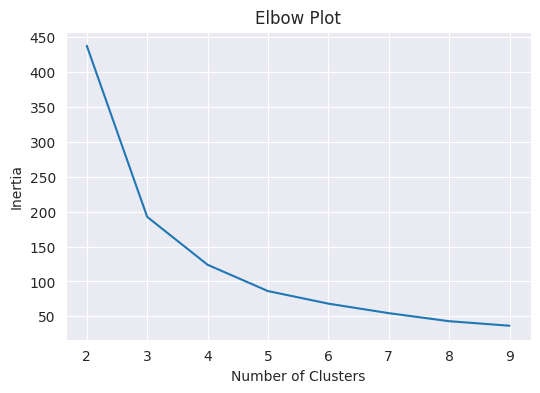

In [24]:
# Algo 1: K-means

# Hyperparameter to tune
kmeans_hparam = "n_clusters"

# Identifying the "optimal" number of clusters
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state, n_init=10).fit(X)
    inertias_1.append(kmeans_1.inertia_)

# Graficar los resultados
fig, axs = plt.subplots(figsize=(6, 4))
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Análisis: 3 clusters, aunque hay un leve cambio de dirección en 5. Este es, por tanto, el número a elegir. Esto está en línea de lo que se sabía al mirar los datos.

Algorithm converged successfully!
n_iter: 5, max_iter: 300



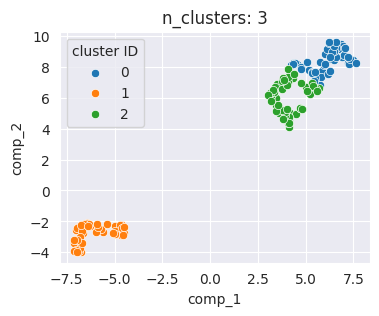

Training time: 0.13 seconds
CPU times: user 772 ms, sys: 43.3 ms, total: 816 ms
Wall time: 1.69 s


In [25]:
#Run with optimised n_clusters

%%time

# Run with optimised n_clusters
start_time = time.time()

kmeans = KMeans(n_clusters=3, random_state=fixed_random_state, n_init=10)  # Explicitly set n_init to 10

labels_1 = kmeans.fit_predict(X)

convergence_check(kmeans)

training_times.append(time.time() - start_time)

visualize_clusters(df=X, labels_all=labels_1, hyperparam_name='n_clusters', hyperparam_val=3, noise_exist=False)

print(f"Training time: {training_times[-1]:.2f} seconds")


In [26]:
#Algo 2: Mean shift

# hyperparamter to tune

meanshift_hparam = "bandwidth"

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Algorithm converged successfully!
n_iter: 10, max_iter: 300



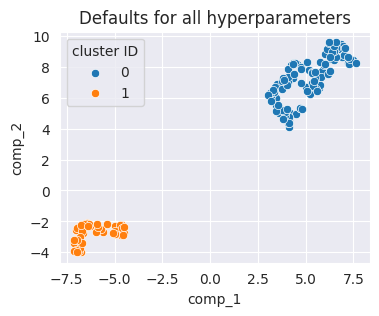

CPU times: user 922 ms, sys: 221 ms, total: 1.14 s
Wall time: 4.19 s


In [27]:
#Vanilla run (defaults for all hyperparameters)

%%time

start_time = time.time()

meanshift = MeanShift(n_jobs=n_parallel_jobs)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_times.append(time.time() - start_time)

visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

Algorithm converged successfully!
n_iter: 10, max_iter: 300



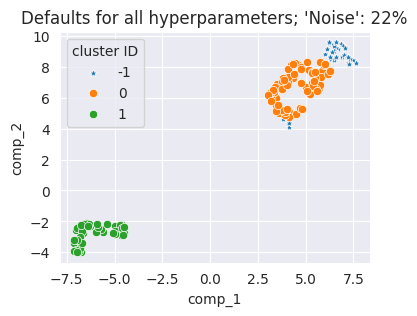

CPU times: user 921 ms, sys: 62.8 ms, total: 984 ms
Wall time: 1.95 s


In [28]:
#Allowing for 'noise'
#This is enabled by setting cluster_all=False.

%%time

start_time = time.time()

meanshift = MeanShift(cluster_all=False, n_jobs=n_parallel_jobs)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_time_meanshift_noise = time.time() - start_time

visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

In [29]:
#Algo 3: Gaussian Mixture

# hyperparamter to tune
gmm_hparam = "n_components"

Algorithm converged successfully!
n_iter: 12, max_iter: 100



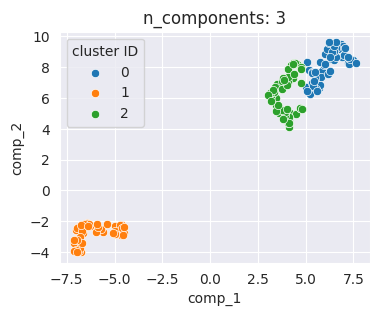

CPU times: user 704 ms, sys: 116 ms, total: 820 ms
Wall time: 1.23 s


In [30]:
%%time

start_time = time.time()

gmm = GaussianMixture(n_components=3, random_state=fixed_random_state)

labels_3 = gmm.fit_predict(X)

convergence_check(gmm)

training_times.append(time.time() - start_time)

visualize_clusters(df=X, labels_all=labels_3, hyperparam_name=gmm_hparam, hyperparam_val=3, noise_exist=False)

In [31]:
#Algo 4: Affinity propagation

# hyperparamter to tune

affprop_hparam = "damping"

Algorithm converged successfully!
n_iter: 33, max_iter: 200



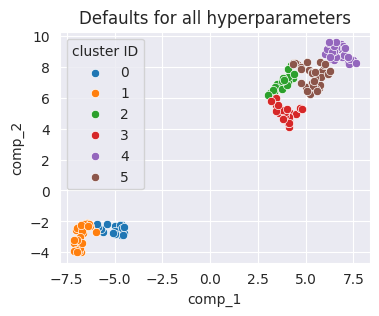

CPU times: user 910 ms, sys: 103 ms, total: 1.01 s
Wall time: 1.53 s


In [32]:
%%time

affprop = AffinityPropagation(random_state=fixed_random_state)

labels_4 = affprop.fit_predict(X)

convergence_check(affprop)

visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

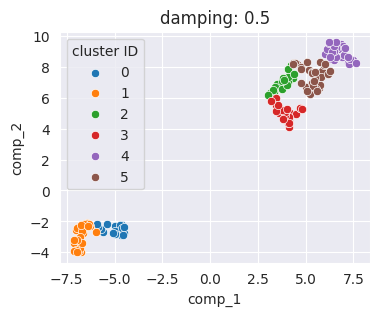

Algorithm converged successfully!
n_iter: 33, max_iter: 500



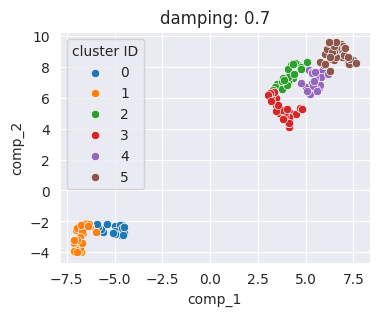

Algorithm converged successfully!
n_iter: 25, max_iter: 500



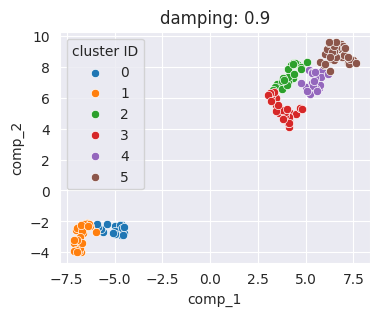

Algorithm converged successfully!
n_iter: 48, max_iter: 500



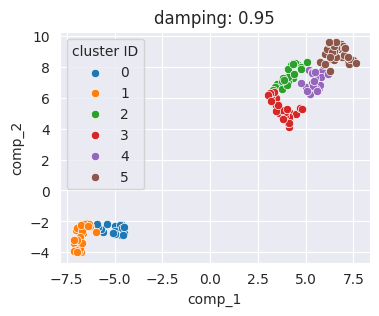

Algorithm converged successfully!
n_iter: 84, max_iter: 500



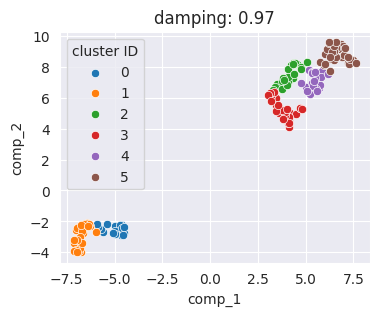

Algorithm converged successfully!
n_iter: 132, max_iter: 500



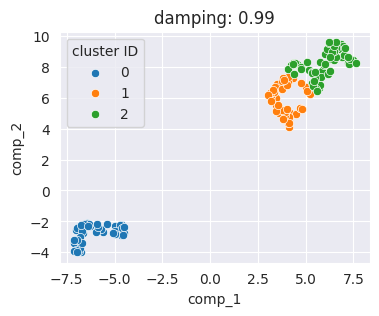

Algorithm converged successfully!
n_iter: 315, max_iter: 500

CPU times: user 5.43 s, sys: 238 ms, total: 5.67 s
Wall time: 10.9 s


In [33]:
#Tuning runs for "damping"

%%time

damps = [0.5, 0.7, 0.9, 0.95, 0.97, 0.99]

for d in damps:
    affprop = AffinityPropagation(damping=d, max_iter=500, random_state=fixed_random_state)
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=d, noise_exist=False)
    convergence_check(affprop)

In [34]:
#Tuning runs for "preference"
#In order to still get to the "expected solution" of finding 3 clusters,
#another hyperparamter, preference is investigated. As stated in the beginning
#though, the self-imposed contraint here is to only tune a single hyperparameter,
#leaving all others at their default values, i.e. not looking for any interactions between them.

# hyperparamter to tune

affprop_hparam = "preference"

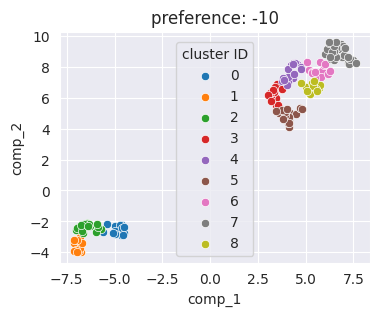

Algorithm converged successfully!
n_iter: 39, max_iter: 500



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


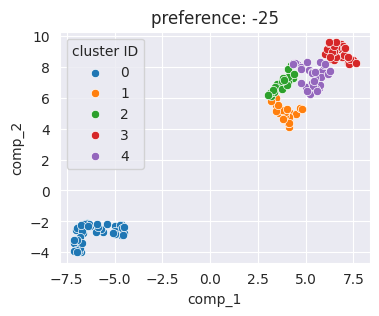

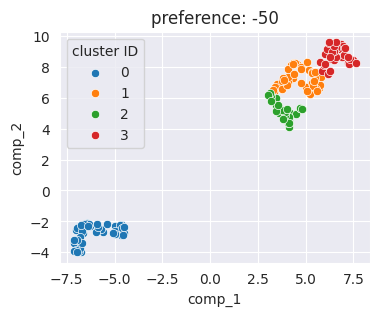

Algorithm converged successfully!
n_iter: 36, max_iter: 500



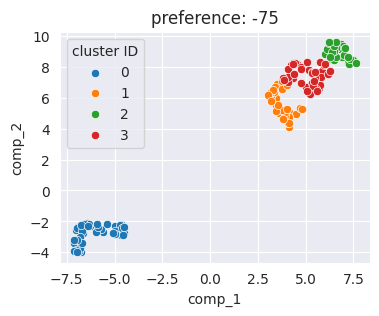

Algorithm converged successfully!
n_iter: 61, max_iter: 500



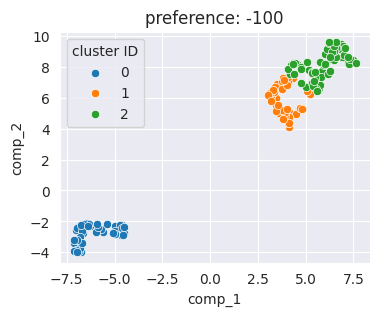

Algorithm converged successfully!
n_iter: 111, max_iter: 500

CPU times: user 5.12 s, sys: 278 ms, total: 5.4 s
Wall time: 9.7 s


In [35]:
%%time

prefs = [-10, -25, -50, -75, -100]

for p in prefs:
    affprop = AffinityPropagation(preference=p, max_iter=500, random_state=fixed_random_state)
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=p, noise_exist=False)
    convergence_check(affprop)

In [36]:
#Re-run with optimised preference

%%time

start_time = time.time()

affprop = AffinityPropagation(preference=-75, max_iter=500, random_state=fixed_random_state)

labels_4 = affprop.fit_predict(X)

convergence_check(affprop)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 61, max_iter: 500

CPU times: user 42.3 ms, sys: 1.09 ms, total: 43.4 ms
Wall time: 104 ms


In [37]:
#Algo 5: DBSCAN

# hyperparamter to tune

dbscan_hparam = "eps"

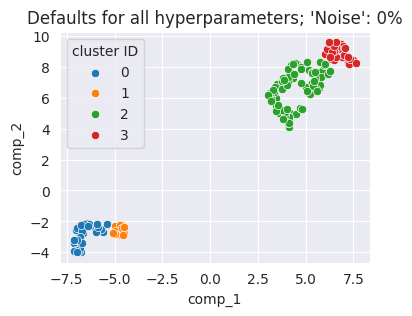

CPU times: user 759 ms, sys: 30.8 ms, total: 789 ms
Wall time: 1.3 s


In [38]:
#Vanilla run (defaults for all hyperparameters)

%%time

dbscan = DBSCAN(n_jobs=n_parallel_jobs)

labels_5 = dbscan.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

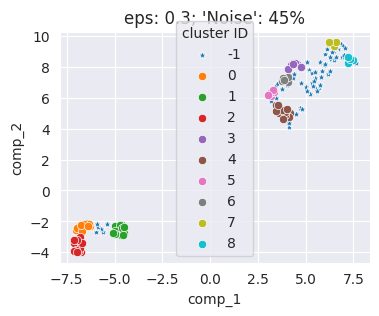

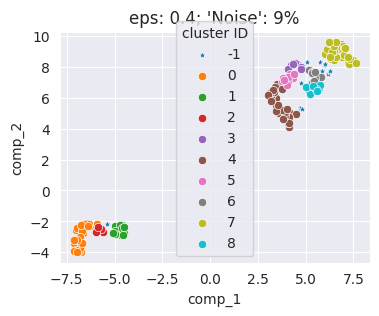

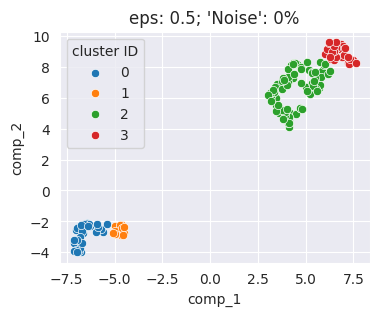

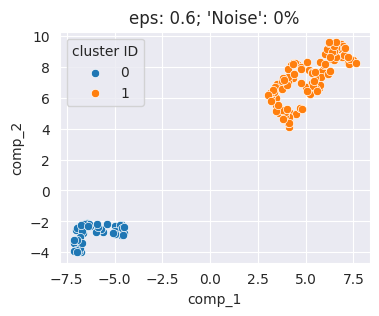

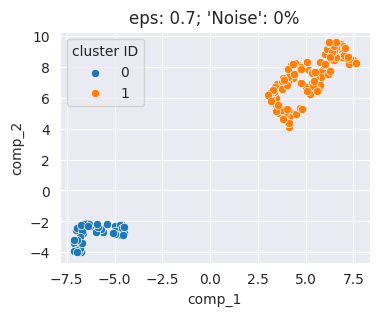

CPU times: user 4.35 s, sys: 260 ms, total: 4.61 s
Wall time: 7.49 s


In [39]:
#Tuning runs for eps

%%time

for e in [0.3, 0.4, 0.5, 0.6, 0.7]:

    dbscan = DBSCAN(eps=e, n_jobs=n_parallel_jobs)
    labels_5 = dbscan.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=dbscan_hparam, hyperparam_val=e, noise_exist=True)

In [40]:
#Re-run with optimised eps

%%time

eps_val = 0.6

start_time = time.time()

dbscan = DBSCAN(eps=eps_val, n_jobs=n_parallel_jobs)

labels_5 = dbscan.fit_predict(X)

training_times.append(time.time() - start_time)

CPU times: user 9.99 ms, sys: 120 µs, total: 10.1 ms
Wall time: 58.6 ms


In [41]:
#Algo 6: OPTICS

# hyperparamter to tune

optics_hparam = "min_samples"


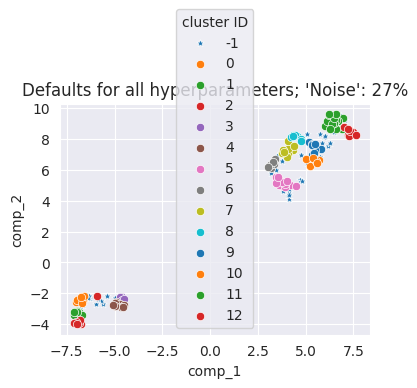

CPU times: user 2.02 s, sys: 188 ms, total: 2.21 s
Wall time: 5.77 s


In [42]:
#Vanilla run (defaults for all hyperparameters)

%%time

optics = OPTICS(n_jobs=n_parallel_jobs)

labels_6 = optics.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

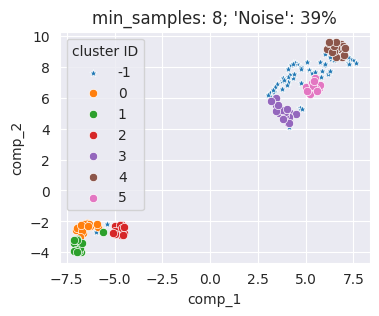

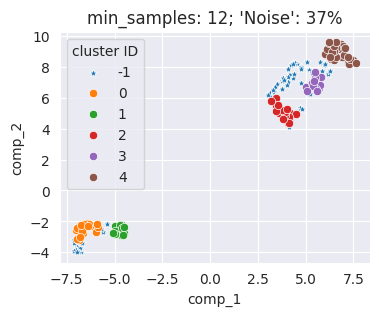

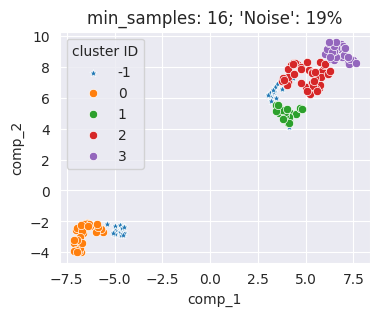

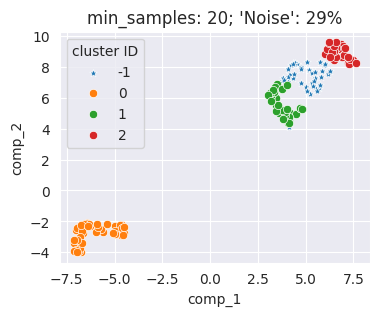

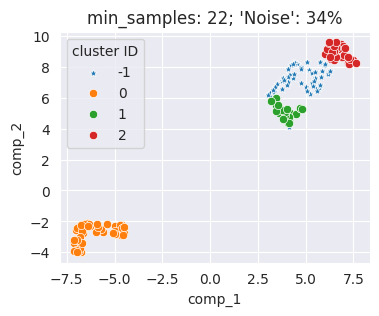

CPU times: user 5.44 s, sys: 1.16 s, total: 6.59 s
Wall time: 13.1 s


In [43]:
#Tuning runs for min_samples

%%time

for n_samples in [8, 12, 16, 20, 22]:

    optics = OPTICS(min_samples=n_samples, n_jobs=n_parallel_jobs)

    labels_6 = optics.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=optics_hparam, hyperparam_val=n_samples, noise_exist=True)

In [44]:
#Re-run with optimised min_samples

%%time
n_samples = 20

start_time = time.time()

optics = OPTICS(min_samples=n_samples, n_jobs=n_parallel_jobs)

labels_6 = optics.fit_predict(X)

training_times.append(time.time() - start_time)

CPU times: user 549 ms, sys: 149 ms, total: 698 ms
Wall time: 2.08 s


Length of algos: 6
Length of training_times: 6


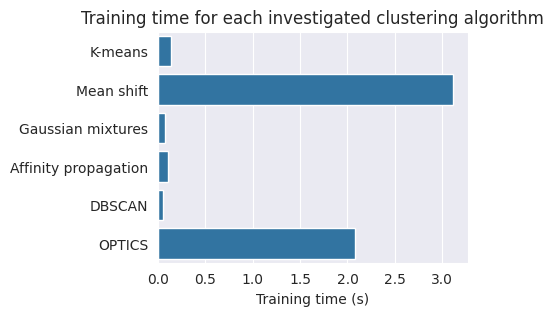

In [45]:
#Comparison of training times
print("Length of algos:", len(algos))
print("Length of training_times:", len(training_times))

plt.figure(figsize=std_figure_size)
# Ensure both lists have the same length before plotting
# Example fix, adjust based on your actual data:
if len(algos) > len(training_times):
    algos = algos[:len(training_times)]  # Trim 'algos' to match
elif len(training_times) > len(algos):
    training_times = training_times[:len(algos)] # Trim 'training_times' to match

sns.barplot(y=algos, x=training_times)
plt.title("Training time for each investigated clustering algorithm")
plt.xlabel("Training time (s)")
plt.show()


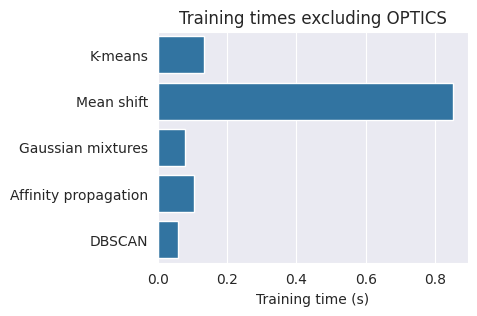

In [54]:
# overwriting the training time for Mean shift

training_times[1] = training_time_meanshift_noise

plt.figure(figsize=std_figure_size)
sns.barplot(y=algos[:-1], x=training_times[:-1])
plt.title("Training times excluding OPTICS")
plt.xlabel("Training time (s)")
plt.show()

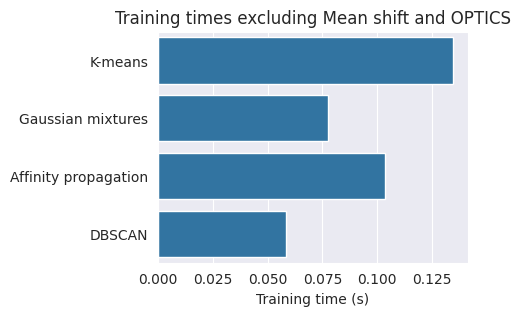

In [53]:
# Training times excluding 'Mean shift' y 'OPTICS'
filtered_algos = ['K-means','Gaussian mixtures', 'Affinity propagation', 'DBSCAN']
filtered_training_times = [training_times[algos.index(algo)] for algo in filtered_algos]

# Crear un gráfico de barras de los tiempos de entrenamiento para los algoritmos filtrados
plt.figure(figsize=std_figure_size)
sns.barplot(y=filtered_algos, x=filtered_training_times)
plt.title("Training times excluding Mean shift and OPTICS")
plt.xlabel("Training time (s)")
plt.show()

#Conclusión:

En clústeres no existe un algoritmo único que sirva para todos. Los diferentes algoritmos tienden a ser mejores dependiendo de la estructura de los datos y, en particular, de hasta qué punto esta estructura está en consonancia con aquello en lo que se basa cada algoritmo para funcionar satisfactoriamente.

Para la estructura de datos relativamente simple del "conjunto de datos Iris", todos los algoritmos funcionaron bien (después de un cambio de hiperparámetros).

Advertencias:

1.Sólo se consideró el hiperparámetro "más importante" para ajustar cada algoritmo.

2.El conjunto de datos empleado aquí es muy pequeño. Para conjuntos de datos de un tamaño más real, el rendimiento relativo en términos de tiempos de entrenamiento probablemente será diferente.